In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("single_genre_artists.csv")
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [4]:
print(f'Columns = {df.columns}\n')  
print(f'data types = {df.dtypes}\n')  
print(f'shape of the df ={df.shape}\n')  
print(f'total null values(sumed) = {df.isnull().sum()}\n')  
print(f'total duplicate values sumed = {df.duplicated().sum()}\n')

Columns = Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

data types = id_songs               object
name_song              object
popularity_songs        int64
duration_ms             int64
explicit                int64
id_artists             object
release_date           object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
followers             float64
g

In [4]:
df.shape

(95837, 23)

In [5]:
df.drop(['id_songs', 'name_song', 'name_artists'], axis=1, inplace=True)

In [6]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
X = df[features]

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

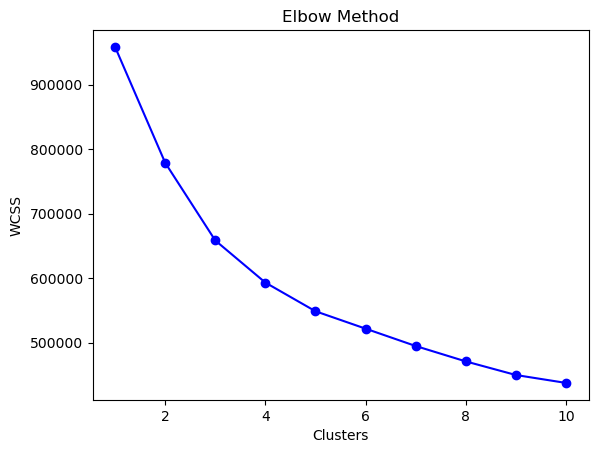

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'K={k}: {score:.3f}')

K=2: 0.203
K=3: 0.242
K=4: 0.231
K=5: 0.186
K=6: 0.186
K=7: 0.165
K=8: 0.172


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
print(df.groupby('cluster')[features].mean())

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis')
plt.title('Clusters (PCA)')
plt.show()

In [ ]:
print(df.groupby('cluster')['genres'].agg(lambda x: x.mode()[0]))

#Insights:
#cluster 0:energy low+high acousticness---Chill Acousticness
#cluster 1:dance+High energy+High tempo+High valence---Party track
#cluster 2:High dance+medium energy+high speechiness+high liveness----rap song,live recordings or spoken word content

In [ ]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
df['db_cluster'] = db.fit_predict(X_scaled)
print(df['db_cluster'].value_counts())

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['db_cluster'], cmap='viridis')
plt.title('DBSCAN Clusters')
plt.show()

In [ ]:
df.to_csv('final_clustered_songs.csv', index=False)
print("Exported with K-Means clusters")

In [ ]:
print(df['cluster'].value_counts(normalize=True).map(lambda x: f"{x:.1%}"))

In [ ]:
##streamlit

In [1]:

import streamlit as st
import pandas as pd
import joblib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')
df = pd.read_csv('single_genre_artists.csv')
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

st.title("Amazon Music Song Cluster Predictor")

st.write("Enter song audio features to predict cluster:")

inputs = {}
for f in features:
    inputs[f] = st.slider(f,
    min_value=0.0 if f in ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence'] else -30.0 if f=='loudness' else 0.0,
    max_value=1.0 if f in ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence'] else -0.0 if f=='loudness' else 200.0 if f=='tempo' else 200000.0,
    value=0.5 if f in ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence'] else -5.0 if f=='loudness' else 120.0 if f=='tempo' else 180000.0,
    step=0.01 if f!='duration_ms' else 1000.0)

input_df = pd.DataFrame([inputs])
input_scaled = scaler.transform(input_df)
cluster = kmeans.predict(input_scaled)[0]

st.write(f"Predicted Cluster: {cluster}")

if cluster == 0:
    st.write("Energetic Dance Tracks")
elif cluster == 1:
    st.write("Balanced Vocal Songs")
else:
    st.write("Calm Acoustic")

# PCA viz
X_scaled = scaler.transform(df[features])
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)
fig, ax = plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis', alpha=0.1)
ax.scatter(pca.transform(input_scaled)[:,0], pca.transform(input_scaled)[:,1], c='red', s=100)
st.pyplot(fig)


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'